# LOADING DATASET

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv(r'Kidney_data.csv')
df = data.copy()
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.drop('id', inplace=True, axis=1)

# TREATING NaN VALUES

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

Let's analyze each column and to treat the NaN values. Starting with age.

In [6]:
idx = np.where(df.age.isna())[0]
# Let's see how the record of these values is.
df.loc[idx]

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
30,NaN,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,93.0,...,NaN,NaN,NaN,yes,yes,no,good,no,no,ckd
73,NaN,100.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,129.0,...,14,6300,NaN,yes,no,no,good,yes,yes,ckd
112,NaN,60.0,1.015,3.0,0.0,abnormal,abnormal,notpresent,notpresent,NaN,...,33,NaN,NaN,no,no,no,good,no,no,ckd
116,NaN,70.0,1.015,4.0,0.0,abnormal,normal,notpresent,notpresent,104.0,...,NaN,NaN,NaN,no,no,no,good,yes,no,ckd
117,NaN,70.0,1.020,0.0,0.0,NaN,NaN,notpresent,notpresent,219.0,...,37,9800,4.4,no,no,no,good,no,no,ckd
169,NaN,70.0,1.010,0.0,2.0,NaN,normal,notpresent,notpresent,220.0,...,27,NaN,NaN,yes,yes,no,good,no,yes,ckd
191,NaN,70.0,1.010,3.0,0.0,normal,normal,notpresent,notpresent,110.0,...,26,9200,3.4,yes,yes,no,poor,no,no,ckd
203,NaN,90.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,207.0,...,NaN,NaN,NaN,yes,yes,no,good,no,yes,ckd
268,NaN,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,100.0,...,53,8500,4.9,no,no,no,good,no,no,notckd


As we can see, the most records has NaN values in other columns, and since there is only 9 records the best to do is delete these records.

In [7]:
df.drop(idx, axis=0, inplace=True)
df.reset_index(inplace=True, drop=True)

For columns whose dtype is different from the object, we will fill with median of the column.

In [8]:
df.fillna({k: df[k].median() for k in df.columns if df[k].dtype != 'object'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              391 non-null    float64
 2   sg              391 non-null    float64
 3   al              391 non-null    float64
 4   su              391 non-null    float64
 5   rbc             244 non-null    object 
 6   pc              330 non-null    object 
 7   pcc             387 non-null    object 
 8   ba              387 non-null    object 
 9   bgr             391 non-null    float64
 10  bu              391 non-null    float64
 11  sc              391 non-null    float64
 12  sod             391 non-null    float64
 13  pot             391 non-null    float64
 14  hemo            391 non-null    float64
 15  pcv             324 non-null    object 
 16  wc              291 non-null    object 
 17  rc              267 non-null    obj

Now, let's to analyze the columns whre dtype is object. 

In [9]:
cols = [col for col in df.columns if df[col].dtype == 'object']
df[cols]

,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,NaN,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,38,6000,NaN,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,normal,normal,notpresent,notpresent,47,6700,4.9,no,no,no,good,no,no,notckd
387,normal,normal,notpresent,notpresent,54,7800,6.2,no,no,no,good,no,no,notckd
388,normal,normal,notpresent,notpresent,49,6600,5.4,no,no,no,good,no,no,notckd
389,normal,normal,notpresent,notpresent,51,7200,5.9,no,no,no,good,no,no,notckd


We can see that there are columns that are number, so let's investigate why dtypes are object.

In [10]:
print(f"{df['pcv'].unique()}")
print(f"{df['wc'].unique()}")
print(f"{df['rc'].unique()}")

['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '22' '18' '42' '17' '46' '23' '19'
 '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '51' '53'
 '54']
['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11200' '19100' '\t?' '12300' '16700' '2600' '26400' '8800'
 '7400' '4900' '8000' '12000' '15700' '4100' '5700' '11500' '5400' '6300'
 '10800' '9900' '5200' '5900' '9300' '9700' '5100' '6600']
['5.2' nan '3.9' '4.6' '4.4' '5' '4.0' '3.7' '3.8' '3.4' '2.6' '2.8' '4.3'
 '3

The reazon is the **\t** caracter that's on some rows. So, let's change it.

In [11]:
for col in ['pcv', 'wc', 'rc']:
    lst = df[col].to_numpy()
    df.replace(r'\t', '', regex=True, inplace=True)
    rows = np.where(lst == '?')[0]
    median = df[col].where(lst != '?').median()
    df.loc[rows, col] = np.round(median, 0)
    df[col] = pd.to_numeric(df[col])

Now, we can treat the NaN values of columns of object.

In [12]:
for col in df.columns:
    df[col].fillna(df[col].mode()[0], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              391 non-null    float64
 2   sg              391 non-null    float64
 3   al              391 non-null    float64
 4   su              391 non-null    float64
 5   rbc             391 non-null    object 
 6   pc              391 non-null    object 
 7   pcc             391 non-null    object 
 8   ba              391 non-null    object 
 9   bgr             391 non-null    float64
 10  bu              391 non-null    float64
 11  sc              391 non-null    float64
 12  sod             391 non-null    float64
 13  pot             391 non-null    float64
 14  hemo            391 non-null    float64
 15  pcv             391 non-null    float64
 16  wc              391 non-null    float64
 17  rc              391 non-null    flo

Finally, let's encode the columns of strings in numbers.

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
for col in df.columns:
    if col != 'classification':
        if df[col].dtype == 'object':
            df[col] = le.fit_transform(df[col])
df['classification'].replace({'ckd': 1, 'notckd': 0}, inplace=True)

Now, that all columns are treated, let's start the analysis by checking if there are two features with a high level of correlation.

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

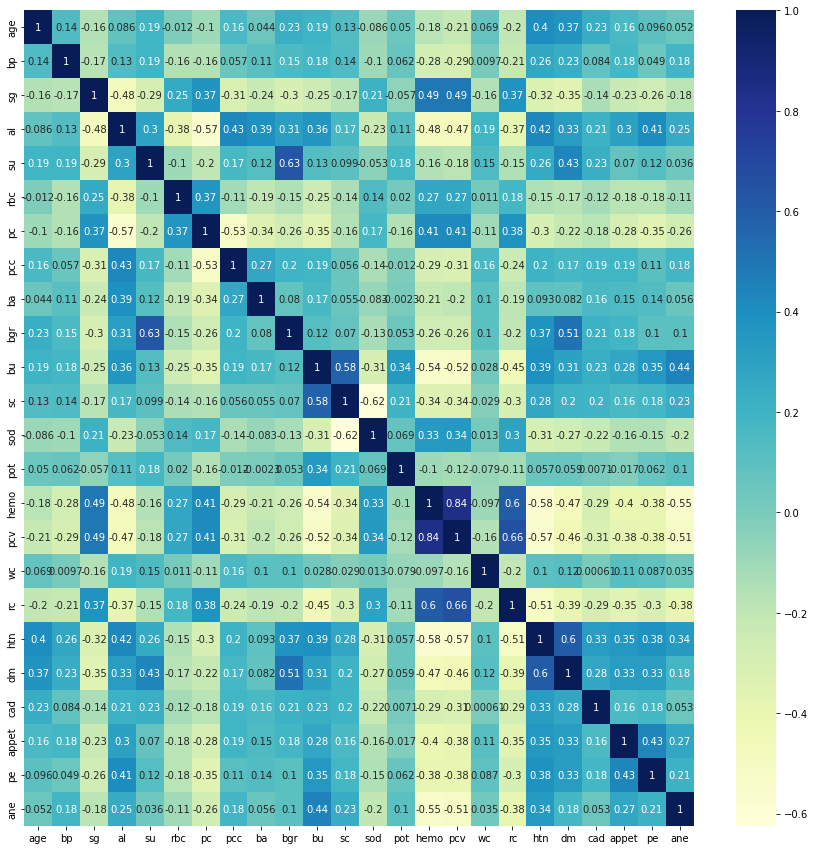

In [16]:
fig = plt.figure(figsize=(15, 15))
X = df.drop('classification', axis=1)
sns.heatmap(data=X.corr(),
            annot=True,
            cmap='YlGnBu')
plt.show()

As we can see, the **hemo** and **pcv** have 84% of correlation, so we let's delete one column. I chooses to delete the **pcv column**.

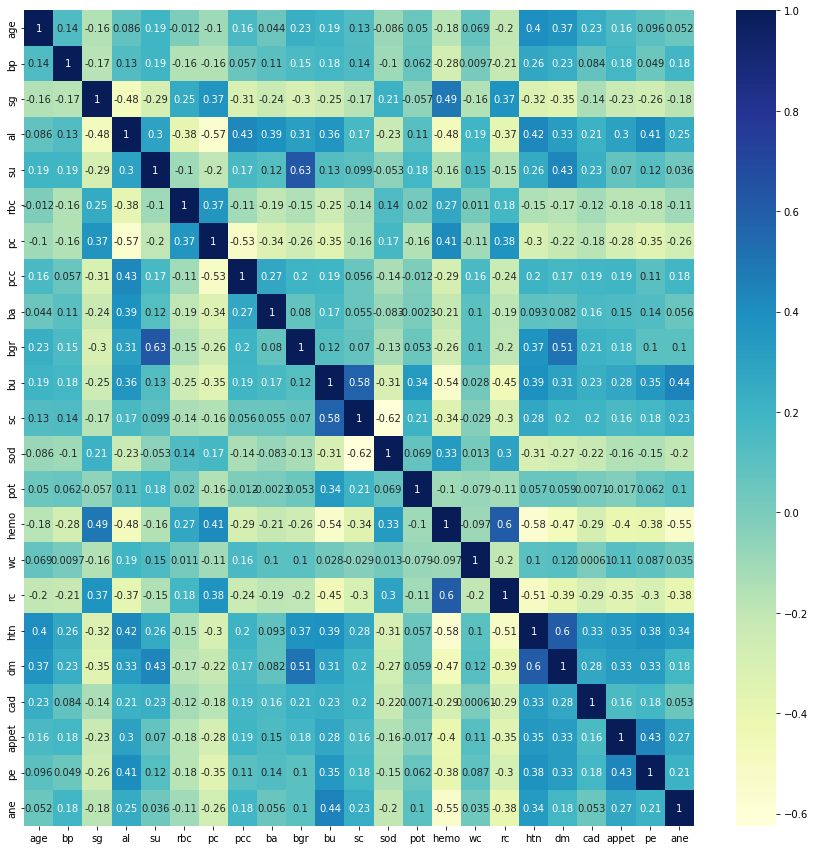

In [17]:
df.drop('pcv', axis=1, inplace=True)
fig = plt.figure(figsize=(15, 15))
X = df.drop('classification', axis=1)
sns.heatmap(data=X.corr(), #Correlation between data of dataframe
            annot=True, #If True will show the numbers
            cmap='YlGnBu') #Define the color of heatmap
plt.show()

Now that the data are ready, we'll export it to next folder where we'll develep the machine learning model.

In [18]:
df.to_csv(r'C:\Users\USER\OneDrive\Documentos\Programação\Python\Projetos\trainDataScience\DataScience__Cancer\Step2 - Machine Learning Model\Kidney_data.csv', index=False)